In [61]:
import random
from matplotlib import pyplot as plt
from queue import LifoQueue
from math import atan, pi, radians

In [62]:
class Point:
    def __init__(self, num_points):
        self.xpoint = self.get_random(num_points)
        self.ypoint = self.get_random(num_points)

    def get_random(self, num_points):
        return random.randrange(1, num_points * 100)
        # The options to pick from will be 100 times the number of points
        # This is only here to minimize the probably of ending up with collinear points
        # This is important for our assumtption -> No three points are collinear

In [63]:
def generatePoints(n):
    points = [Point(n) for x in range(n)]

    return points

In [64]:
n=23
points = generatePoints(n)

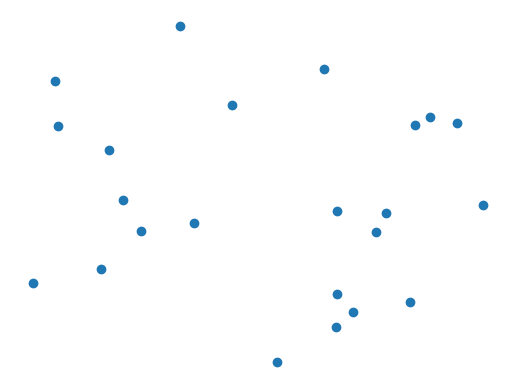

In [65]:
xpoints = [p.xpoint for p in points]
ypoints = [p.ypoint for p in points]
plt.plot(xpoints, ypoints, 'o')
plt.axis('off')
plt.show()

In [66]:
stack = LifoQueue(maxsize=n)

In [67]:
def findReferencePoint(points):
    ref_point = None
    for p in points:
        if not ref_point:
            ref_point = p
        elif p.ypoint < ref_point.ypoint:
            ref_point = p

    return ref_point

ref_point = findReferencePoint(points)

In [68]:
stack.put(ref_point)

In [69]:
points_ordered_by_angle = []

def calculateAngle(ref_point, point):
    angle = 0
    # 90 and 180 degrees means the points are collinear
    # When the points share an x axis, we will have a division by zero problem
    # In this case, we already know the angle is 90 degrees or half of pi
    if ref_point.xpoint == point.xpoint:
        angle = pi/2
    elif ref_point.ypoint == point.ypoint:
        # When the points share a y axis, the angle between them is 180 degrees (pi radians)
        angle = pi
    else:
        # Otherwise we calculate the angle from trig identities
        # Tan = O/A -> Tan inverse (atan) gives us the angle
        angle = atan((abs(ref_point.ypoint - point.ypoint))/(abs(ref_point.xpoint - point.xpoint)))

    return angle

for p in points:
    if ref_point != p:
        angle = calculateAngle(ref_point, p)
        # All angles should be checked counterclockwise
        if ref_point.ypoint > p.ypoint:
            # pi radians = 180 degrees
            angle = pi - angle

        points_ordered_by_angle.append({"angle": angle, "point": p})

# Sort the points by angle
points_ordered_by_angle = sorted(points_ordered_by_angle, key=lambda d: d['angle'], reverse=True)
points_ordered_by_angle

[{'angle': 1.4482555067513005, 'point': <__main__.Point at 0x7fbce49d3df0>},
 {'angle': 1.4372233042630114, 'point': <__main__.Point at 0x7fbce49d2140>},
 {'angle': 1.3545085602090159, 'point': <__main__.Point at 0x7fbce49d19f0>},
 {'angle': 1.2755991345744802, 'point': <__main__.Point at 0x7fbce49d1e40>},
 {'angle': 1.1503464369803882, 'point': <__main__.Point at 0x7fbce49d00a0>},
 {'angle': 1.1450880278605473, 'point': <__main__.Point at 0x7fbce49d2170>},
 {'angle': 1.1246241422815242, 'point': <__main__.Point at 0x7fbce49d2080>},
 {'angle': 1.0593363706438448, 'point': <__main__.Point at 0x7fbce49d22f0>},
 {'angle': 1.0477780150574778, 'point': <__main__.Point at 0x7fbce49d0fd0>},
 {'angle': 1.040519885450726, 'point': <__main__.Point at 0x7fbce49d2c50>},
 {'angle': 1.027234969465305, 'point': <__main__.Point at 0x7fbce49d24d0>},
 {'angle': 1.0241922178113667, 'point': <__main__.Point at 0x7fbce49d2770>},
 {'angle': 0.9786379030164881, 'point': <__main__.Point at 0x7fbce49d2740>},
 